In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\DS\\Dataset\\Final Project\\Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [5]:
for col in df.columns:
    print(f'Column : {col} \n Unique Value {df[col].unique()} \n')

Column : ID 
 Unique Value [ 24890  24891  24892 ... 173557 173558 173559] 

Column : year 
 Unique Value [2019] 

Column : loan_limit 
 Unique Value ['cf' nan 'ncf'] 

Column : Gender 
 Unique Value ['Sex Not Available' 'Male' 'Joint' 'Female'] 

Column : approv_in_adv 
 Unique Value ['nopre' 'pre' nan] 

Column : loan_type 
 Unique Value ['type1' 'type2' 'type3'] 

Column : loan_purpose 
 Unique Value ['p1' 'p4' 'p3' 'p2' nan] 

Column : Credit_Worthiness 
 Unique Value ['l1' 'l2'] 

Column : open_credit 
 Unique Value ['nopc' 'opc'] 

Column : business_or_commercial 
 Unique Value ['nob/c' 'b/c'] 

Column : loan_amount 
 Unique Value [ 116500  206500  406500  456500  696500  706500  346500  266500  376500
  436500  136500  466500  226500   76500  356500  156500  586500  306500
  316500  336500  426500  476500  196500  186500  246500  216500  506500
  656500  256500  396500  166500  236500  866500  416500  386500  596500
  606500   86500  286500  146500  446500  636500  486500  32650

In [6]:
df = df.drop(columns = ['ID', 'year'])

In [7]:
df["Gender"].replace({
    "Sex Not Available": np.nan,
}, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_18612\2538838977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({


In [8]:
df['Gender'].unique()

array([nan, 'Male', 'Joint', 'Female'], dtype=object)

In [9]:
df['Status'] = df['Status'].map({1 : 'Default', 0 : 'Not Default'})

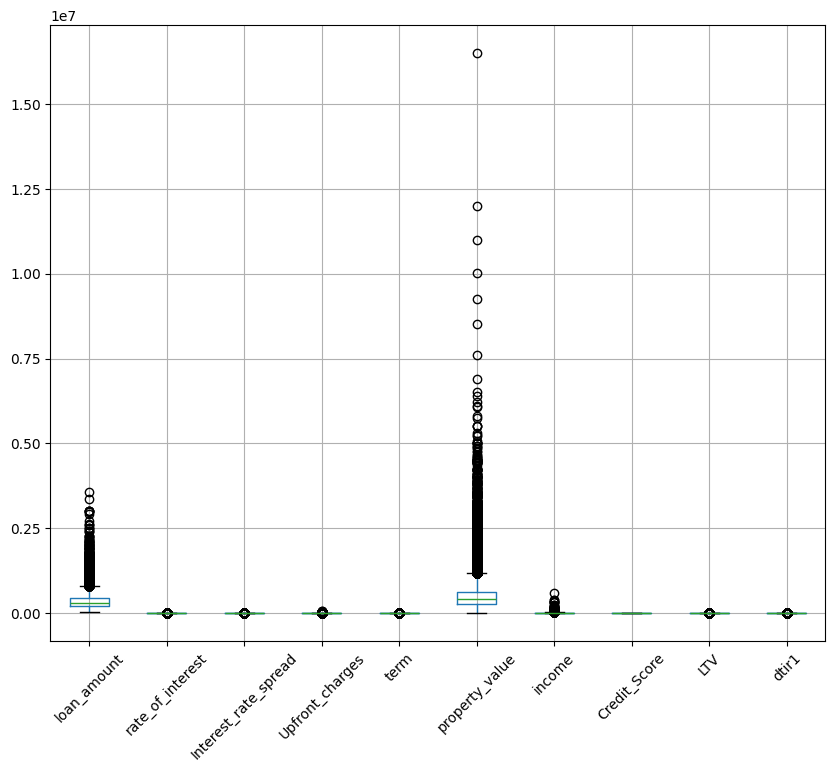

In [ ]:
# Detecting Outliers using Box Plot.
plt.figure(figsize = (10, 8))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [11]:
df.isnull().sum()

loan_limit                    3344
Gender                       37659
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region              

In [ ]:
# Numerical Columns from our dataset
numeric_cols = df.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns :\n',numeric_cols)

Numerical Columns :
 Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1'],
      dtype='object')


In [ ]:
# Numerical columns with null columns from our dataset
numeric_cols_with_null = []

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        numeric_cols_with_null.append(col)
        
print("Numerical Columns with NULL values: ", numeric_cols_with_null)

Numerical Columns with NULL values:  ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']


In [ ]:
# Categrical columns from our dataset
categorical_cols = df.select_dtypes(include = ['object']).columns
print('Categorical Columns :\n',categorical_cols)

Categorical Columns :
 Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type', 'Status'],
      dtype='object')


In [ ]:
# Categorical columns with null columns from our dataset
categorical_cols_with_null = []

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        categorical_cols_with_null.append(col)
        
print("Categorical Columns with NULL values: ", categorical_cols_with_null)

Categorical Columns with NULL values:  ['loan_limit', 'Gender', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']


In [ ]:
# Filling Numerical Columns that contain null values.
df[numeric_cols_with_null] = df[numeric_cols_with_null].fillna(df[numeric_cols_with_null].median())

In [ ]:
# Filling Categorical Columns that contain null values.
df[categorical_cols_with_null] = df[categorical_cols_with_null].fillna(df[categorical_cols_with_null].mode().iloc[0])

In [18]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Detecting Outlier Columns :-
numeric_cols = df.select_dtypes(include= ['int64', 'float64']).columns

outlier_columns = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[ (df[col] < lower) | (df[col] > upper)]
    
    if len(outliers) > 0:
        print(f" {col} -> Outliers Present ({len(outliers)} rows)")
        outlier_columns.append(col)
    else:
        print(f'{col} -> No outliers')
 
print(f'\nOutlier Columns :',outlier_columns)

 loan_amount -> Outliers Present (1895 rows)
 rate_of_interest -> Outliers Present (6817 rows)
 Interest_rate_spread -> Outliers Present (11478 rows)
 Upfront_charges -> Outliers Present (8915 rows)
 term -> Outliers Present (26944 rows)
 property_value -> Outliers Present (6596 rows)
 income -> Outliers Present (7636 rows)
Credit_Score -> No outliers
 LTV -> Outliers Present (4671 rows)
 dtir1 -> Outliers Present (5508 rows)

Outlier Columns : ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']


In [ ]:
# Removing Outliers from oulier column.
outlier_columns = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'LTV', 'dtir1']

for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower, upper)
    
print('Ouliers Clipped Successfully')

Ouliers Clipped Successfully


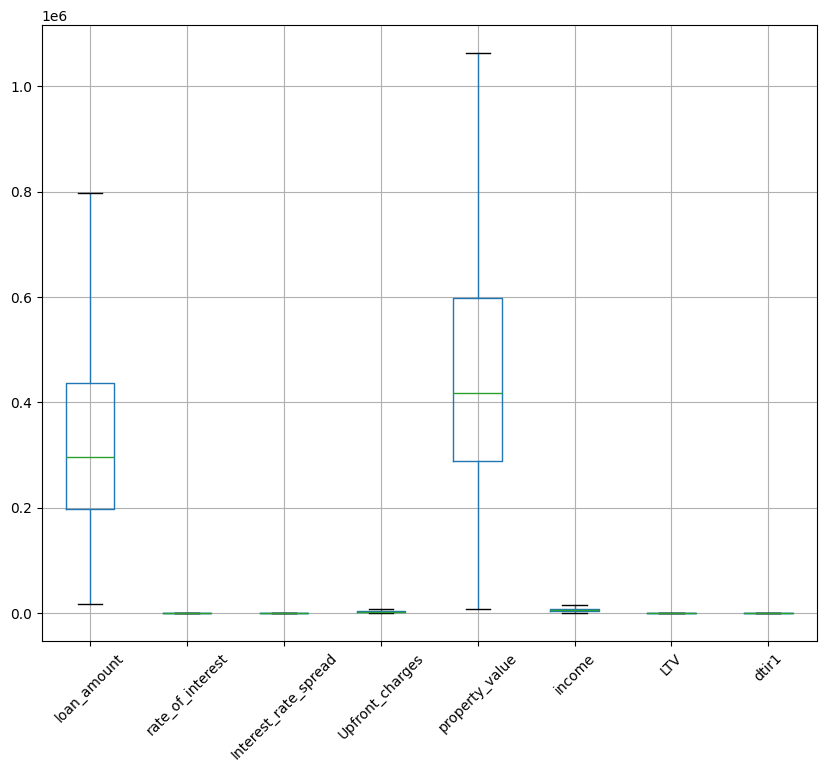

In [21]:
plt.figure(figsize = (10, 8))
df[outlier_columns].boxplot()
plt.xticks(rotation = 45)
plt.show()

In [22]:
for col in df.columns:
    print(f'Column : {col} \n Unique Values : {df[col].unique()} \n')

Column : loan_limit 
 Unique Values : ['cf' 'ncf'] 

Column : Gender 
 Unique Values : ['Male' 'Joint' 'Female'] 

Column : approv_in_adv 
 Unique Values : ['nopre' 'pre'] 

Column : loan_type 
 Unique Values : ['type1' 'type2' 'type3'] 

Column : loan_purpose 
 Unique Values : ['p1' 'p4' 'p3' 'p2'] 

Column : Credit_Worthiness 
 Unique Values : ['l1' 'l2'] 

Column : open_credit 
 Unique Values : ['nopc' 'opc'] 

Column : business_or_commercial 
 Unique Values : ['nob/c' 'b/c'] 

Column : loan_amount 
 Unique Values : [116500 206500 406500 456500 696500 706500 346500 266500 376500 436500
 136500 466500 226500  76500 356500 156500 586500 306500 316500 336500
 426500 476500 196500 186500 246500 216500 506500 656500 256500 396500
 166500 236500 796500 416500 386500 596500 606500  86500 286500 146500
 446500 636500 486500 326500  56500 496500 106500 126500 296500 176500
 566500 686500 556500 676500 366500 276500 716500  66500 616500  96500
  26500 666500 546500 526500 726500 536500 516500

In [23]:
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Male,nopre,type1,p1,l1,nopc,nob/c,116500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,Default,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.99,0.3904,2596.45,360.0,not_neg,not_int,lpsm,418000.0,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,75.135870,North,direct,Default,39.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,Not Default,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,2596.45,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,Not Default,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,Not Default,39.0


In [24]:
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

In [25]:
df['Status'].value_counts()

Status
Not Default    112031
Default         36639
Name: count, dtype: int64

# Logistic Regression :-

In [26]:
# Load Libraries :-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
# Feature and Target Variable :-
x = df.drop(columns= ['Status'])
y = df['Status']

In [28]:
# Encoding :-
x = pd.get_dummies(x,drop_first= True)

In [29]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=17)

In [30]:
# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
# Model Building 
LR = LogisticRegression()
LR.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
# Predict
y_train_pred =  LR.predict(x_train_scaled)
y_test_pred = LR.predict(x_test_scaled)


In [33]:
df['Status'].value_counts()

Status
Not Default    112031
Default         36639
Name: count, dtype: int64

In [34]:
# accuracy 
y_train_acc = accuracy_score(y_train,y_train_pred)
y_test_acc = accuracy_score(y_test,y_test_pred)

In [35]:
# Model Evaluation :-
print('Accuracy : ',y_test_acc)
print('\nConfusion Matrix :\n ', confusion_matrix(y_test,y_test_pred))
print('\nClassification Report :\n ', classification_report(y_test,y_test_pred))

Accuracy :  0.8722674379498218

Confusion Matrix :
  [[ 3839  3481]
 [  317 22097]]

Classification Report :
                precision    recall  f1-score   support

     Default       0.92      0.52      0.67      7320
 Not Default       0.86      0.99      0.92     22414

    accuracy                           0.87     29734
   macro avg       0.89      0.76      0.79     29734
weighted avg       0.88      0.87      0.86     29734



MODEL TUNING : Logistic Regression

In [36]:
from sklearn.model_selection import GridSearchCV
lr_params = {
    "C": [0.01, 0.1, 1, 10],       
    "penalty": ["l2"],            
    "class_weight": [None, "balanced"],
    "solver": ["lbfgs"]
} 

lr_grid = GridSearchCV(
    estimator=LR,
    param_grid=lr_params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

lr_grid.fit(x_train_scaled, y_train)

print("Best LR Params:", lr_grid.best_params_)
print("Best LR CV Score:", lr_grid.best_score_)

Best LR Params: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR CV Score: 0.8730913833253704


In [37]:
best_lr = lr_grid.best_estimator_

y_pred_lr = best_lr.predict(x_test_scaled)

print("\n Logistic Regression Test Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



 Logistic Regression Test Performance
Accuracy: 0.8722001748839712
[[ 3836  3484]
 [  316 22098]]
              precision    recall  f1-score   support

     Default       0.92      0.52      0.67      7320
 Not Default       0.86      0.99      0.92     22414

    accuracy                           0.87     29734
   macro avg       0.89      0.75      0.79     29734
weighted avg       0.88      0.87      0.86     29734



# Random Forest :-

In [38]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=17)
RF.fit(x_train,y_train)

# Predict :-
y_train_hat = RF.predict(x_train)
y_test_hat = RF.predict(x_test)

# Accuracy :-
rf_train_acc = accuracy_score(y_train, y_train_hat)
rf_test_acc = accuracy_score(y_test, y_test_hat)

# Model Evaluation :-
print('Accuracy : ',rf_test_acc)
print('\nConfusion Matrix :\n ', confusion_matrix(y_test, y_test_hat))
print('\nClassification Report :\n ', classification_report(y_test, y_test_hat))

Accuracy :  0.9999663684670748

Confusion Matrix :
  [[ 7320     0]
 [    1 22413]]

Classification Report :
                precision    recall  f1-score   support

     Default       1.00      1.00      1.00      7320
 Not Default       1.00      1.00      1.00     22414

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [39]:
# Model Evaluation Checking Overfitting and Underfitting.
if abs(rf_train_acc - rf_test_acc) < 0.05:
    print('Good Fit')
elif rf_train_acc > rf_test_acc:
    print('Model Overfitted')
else:
    print('Model Underfitted')

Good Fit


In [ ]:
# Cross Validated Random Forest Model :-
from sklearn.model_selection import cross_val_score
rf_cv_acc = cross_val_score(RF,x, y, cv=3)
print('Accuracy : ',rf_cv_acc.mean())

Accuracy :  0.9999865474773157


Model Tuning : Random Forest

In [41]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 20, None],
    "class_weight": [None, "balanced"]   # handles target imbalance
}

rf_random_cv = RandomizedSearchCV(RF,param_distributions=rf_params,n_iter=10,scoring="accuracy",cv=3)
rf_random_cv.fit(x_train, y_train) 

rf_best_parms = rf_random_cv.best_params_
rf_best_score = rf_random_cv.best_score_

In [42]:
print(rf_best_parms)

{'n_estimators': 100, 'max_depth': 10, 'class_weight': None}


In [43]:
RF_best = RandomForestClassifier(**rf_best_parms)
RF_best.fit(x_train,y_train)

y_train_pred = RF_best.predict(x_train)
y_test_pred = RF_best.predict(x_test)

rf_best_train_acc = accuracy_score(y_train, y_train_pred)
rf_best_test_acc = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", rf_best_test_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 1.0

Confusion Matrix:
 [[ 7320     0]
 [    0 22414]]

Classification Report:
               precision    recall  f1-score   support

     Default       1.00      1.00      1.00      7320
 Not Default       1.00      1.00      1.00     22414

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [50]:
# Cross Validated Random Forest Model :-
from sklearn.model_selection import cross_val_score
rf_best_cv_acc = cross_val_score(RF_best, x, y, cv=3)
print('Accuracy : ',rf_best_cv_acc.mean())

Accuracy :  1.0


In [44]:
# Model Evaluation Checking Overfitting and Underfitting.
if abs(rf_best_train_acc - rf_best_test_acc) < 0.05:
    print('Good Fit')
elif rf_best_train_acc > rf_best_test_acc:
    print('Model Overfitted')
else:
    print('Model Underfitted')

Good Fit


In [45]:
rf_best_importance = pd.DataFrame({'Features' : x.columns, 'Importance' : RF_best.feature_importances_}).sort_values(by = 'Importance', ascending = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_18612\3957596141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(


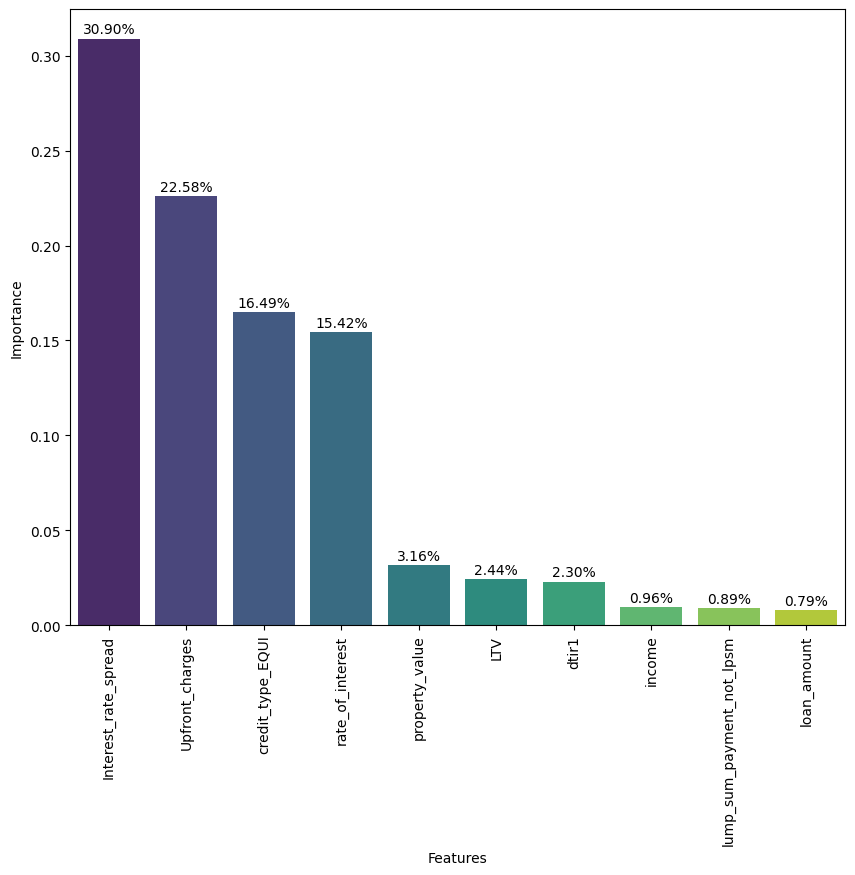

In [46]:
top10 = rf_best_importance.head(10)
plt.figure(figsize = (10,8))
ax =sns.barplot(
    data=top10,
    x='Features',
    y='Importance',
    palette="viridis"
)
for i, value in enumerate(top10['Importance']):
    ax.text(i, value + 0.001, f"{value * 100:.2f}%", ha='center', va='bottom', fontsize=10)
plt.xticks(rotation = 90)
plt.show()

# Prediction For New Data :-

In [47]:
def predict_new_applicant(new_data, model, feature_columns):
    """
    new_data: dict or DataFrame with user input
    model: trained ML model (RF_best, LR)
    feature_columns: columns used during training
    """

    # Convert to DataFrame
    new_df = pd.DataFrame([new_data])

    # Apply one-hot encoding same as training
    new_df = pd.get_dummies(new_df, drop_first=True)

    # Add missing columns
    missing_cols = set(feature_columns) - set(new_df.columns)
    for col in missing_cols:
        new_df[col] = 0

    # Ensure same column order
    new_df = new_df[feature_columns]

    # Predict
    pred = model.predict(new_df)[0]
    pred_prob = model.predict_proba(new_df)[0][1]  # probability of Default

    return pred, pred_prob


In [48]:
new_customer = {
    "loan_amount": 200000,
    "rate_of_interest": 4.5,
    "Interest_rate_spread": 0.2,
    "Upfront_charges": 500,
    "term": 360,
    "property_value": 350000,
    "income": 45000,
    "Credit_Score": 720,
    "LTV": 80,
    "dtir1": 32,
    "loan_limit": "cf",
    "Gender": "Male",
    "approv_in_adv": "nopre",
    "loan_type": "type1",
    "loan_purpose": "p3",
    "Credit_Worthiness": "l1",
    "open_credit": "opc",
    "business_or_commercial": "nob/c",
    "Neg_ammortization": "not_neg",
    "interest_only": "not_int",
    "lump_sum_payment": "not_lpsm",
    "construction_type": "sb",
    "occupancy_type": "pr",
    "Secured_by": "home",
    "total_units": "1U",
    "credit_type": "EXP",
    "co-applicant_credit_type": "EXP",
    "age": "35-44",
    "submission_of_application": "to_inst",
    "Region": "south",
    "Security_Type": "direct"
}


feature_columns = x.columns
prediction, probability = predict_new_applicant(new_customer, RF_best, feature_columns)

print("Predicted Class:", prediction)
print("Probability of Default:", probability)


Predicted Class: Not Default
Probability of Default: 0.9071904201760449
